In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [4]:
print(df.head())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en        

In [5]:
print(df.info())
print("Duplicate Rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
None
Duplicate Rows: 0


In [6]:
print(df.describe())

        Popularity    Vote_Count  Vote_Average
count  9827.000000   9827.000000   9827.000000
mean     40.326088   1392.805536      6.439534
std     108.873998   2611.206907      1.129759
min      13.354000      0.000000      0.000000
25%      16.128500    146.000000      5.900000
50%      21.199000    444.000000      6.500000
75%      35.191500   1376.000000      7.100000
max    5083.954000  31077.000000     10.000000


In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')  # errors='coerce' handles invalid dates
df['Release_Date'] = df['Release_Date'].dt.year

In [8]:
cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(columns=cols_to_drop, inplace=True)

In [9]:
def categorize_col(df, col, labels):
    """
    Categorizes a column based on quartiles and assigns labels.
    """
    stats = df[col].describe()
    edges = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

In [10]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

In [11]:
# Drop any NaNs caused by binning
df.dropna(inplace=True)

In [12]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)


In [13]:
df['Genre'] = df['Genre'].astype('category')
df['Vote_Average'] = df['Vote_Average'].astype('category')


In [14]:
print(df.info())
print(df.nunique())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB
None
Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64
   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940  

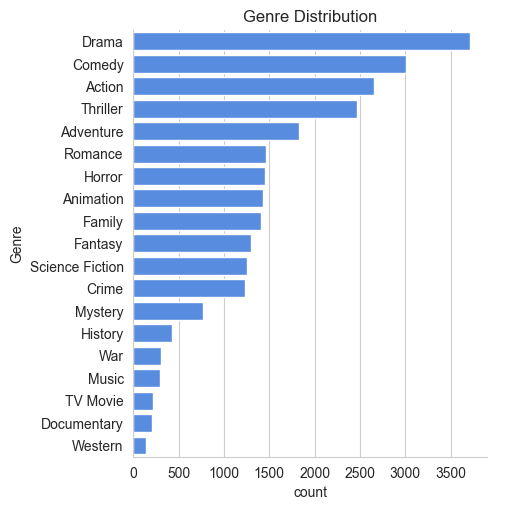

In [15]:
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre Distribution')
plt.show()

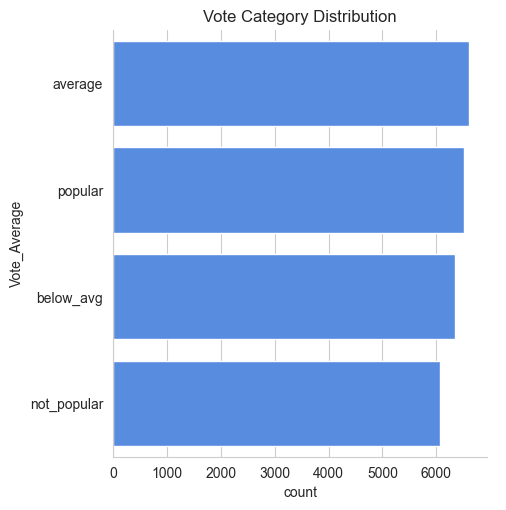

In [16]:
sns.catplot(y='Vote_Average', data=df, kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('Vote Category Distribution')
plt.show()


In [17]:
max_pop = df[df['Popularity'] == df['Popularity'].max()]
print("Most Popular Movie:\n", max_pop)


Most Popular Movie:
    Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  


In [18]:
min_pop = df[df['Popularity'] == df['Popularity'].min()]
print("Least Popular Movie:\n", min_pop)

Least Popular Movie:
        Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25546         152      average            Music  
25547         152      average            Drama  
25548         152      average          History  
25549         186      popular              War  
25550         186      popular            Drama  
25551         186      popular  Science Fiction  


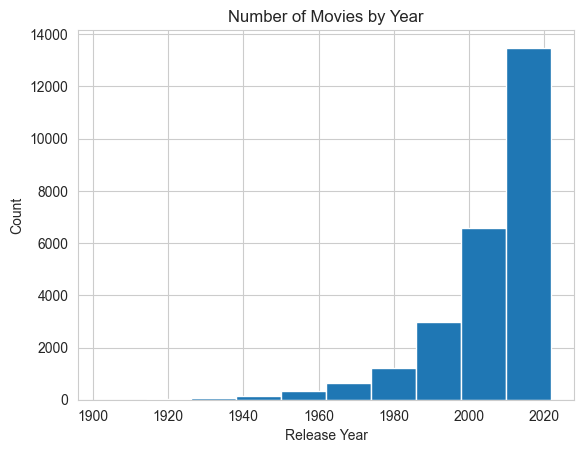

In [19]:
df['Release_Date'].hist()
plt.title('Number of Movies by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()